<a href="https://colab.research.google.com/github/Amos0707/ML/blob/main/8_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Load the dataset
ds = pd.read_csv('WineDataset.csv')

In [ ]:
# data claening
ds.head()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN
3,Louis Latour Mâcon-Lugny 2021/22,We’ve sold this wine for thirty years – and fo...,£17.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,France,10.1,"Peach, Apricot, Floral, Lemon",per bottle,White,ABV 13.50%,Burgundy,Ripe & Rounded,2022,Macon
4,Bread & Butter 'Winemaker's Selection' Pinot N...,Bread & Butter is that thing that you can coun...,£15.99 per bottle,75CL,Pinot Noir,NaN,Natural Cork,USA,10.1,"Smoke, Black Cherry, Cedar, Raspberry, Red Fruit",per bottle,Red,ABV 13.50%,California,Smooth & Mellow,2021,Napa Valley


In [ ]:
ds.tail()

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
1285,"Vouvray Sec 'Expresion de Silex' 2020/21, Loire",Although Denis Meunier is only in his late 20s...,£11.99 per bottle,75CL,Chenin Blanc,NaN,Natural Cork,France,9.4,"Quince, Green Apple, Lemon, Pear",per bottle,White,ABV 12.50%,Loire,Aromatic & Floral,2021,Vouvray
1286,"Waimea Estates Pinot Noir Rosé 2021, Nelson",Waimea’s vineyards are less than 1km from the ...,£13.99 per bottle,75CL,Pinot Noir,NaN,Screwcap,New Zealand,9.8,"Floral, Raspberry, Red Cherry, Strawberry",per bottle,Rosé,ABV 13.00%,Nelson,Delicate & Dry,2021,NaN
1287,Wakefield 'Visionary' Cabernet Sauvignon 2010,Made from the very best fruit nourished by 40-...,£85.00 per bottle,75CL,Cabernet Sauvignon,NaN,Screwcap,Australia,10.1,"Vanilla, Blackberry, Blackcurrant, Cedar, Euca...",per bottle,Red,ABV 13.50%,South Australia,Savoury & Full Bodied,2010,Clare Valley
1288,Yalumba 'The Menzies' Cabernet Sauvignon 2015/...,"In 1961, Sir Robert Menzies said that Yalumba'...",£37.99 per bottle,75CL,Cabernet Sauvignon,NaN,Natural Cork,Australia,10.9,"Black Plum, Blackcurrant, Vanilla",per bottle,Red,ABV 14.50%,South Australia,Savoury & Full Bodied,2016,Coonawarra
1289,"Yalumba 'Virgilius' Viognier 2017, Eden Valley",Yalumba's Virgilius is often regarded as Austr...,£34.99 per bottle,75CL,Viognier,NaN,Screwcap,Australia,10.1,"Peach, Apricot, Floral, Honeysuckle",per bottle,White,ABV 13.50%,NaN,Aromatic & Floral,2017,Eden Valley


In [ ]:
ds.shape

(1290, 17)

In [10]:
ds.columns

Index(['Title', 'Description', 'Price', 'Capacity', 'Grape',
       'Secondary Grape Varieties', 'Closure', 'Country', 'Unit',
       'Characteristics', 'Per bottle / case / each', 'Type', 'ABV', 'Region',
       'Style', 'Vintage', 'Appellation'],
      dtype='object')

<Axes: xlabel='Grape', ylabel='Count'>

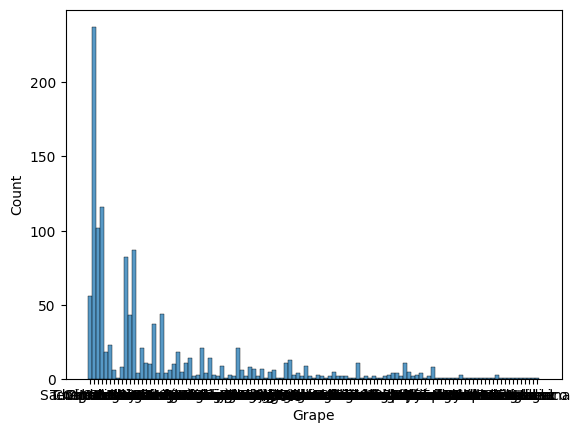

In [21]:
# data visualization
sns.histplot(ds['Grape'])

<Axes: xlabel='Grape', ylabel='Unit'>

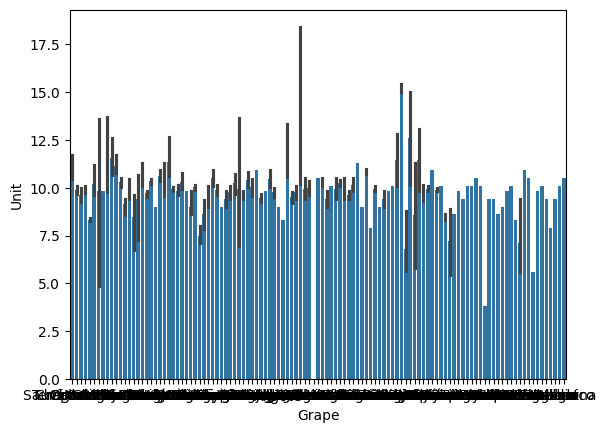

In [23]:
sns.barplot(x='Grape',y='Unit',	data=ds)

In [51]:
#data preprocessing
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Title                      1290 non-null   int64
 1   Description                1290 non-null   int64
 2   Price                      1290 non-null   int64
 3   Capacity                   1290 non-null   int64
 4   Grape                      1290 non-null   int64
 5   Secondary Grape Varieties  1290 non-null   int64
 6   Closure                    1290 non-null   int64
 7   Country                    1290 non-null   int64
 8   Unit                       1290 non-null   int64
 9   Characteristics            1290 non-null   int64
 10  Per bottle / case / each   1290 non-null   int64
 11  Type                       1290 non-null   int64
 12  ABV                        1290 non-null   int64
 13  Region                     1290 non-null   int64
 14  Style                   

In [26]:
# Convert all columns to numeric, coercing errors to NaN
#for col in ds.columns:
    #ds[col] = pd.to_numeric(ds[col], errors='coerce')


In [27]:
ds.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      0 non-null      float64
 1   Description                0 non-null      float64
 2   Price                      0 non-null      float64
 3   Capacity                   0 non-null      float64
 4   Grape                      0 non-null      float64
 5   Secondary Grape Varieties  0 non-null      float64
 6   Closure                    0 non-null      float64
 7   Country                    0 non-null      float64
 8   Unit                       1281 non-null   float64
 9   Characteristics            0 non-null      float64
 10  Per bottle / case / each   0 non-null      float64
 11  Type                       0 non-null      float64
 12  ABV                        0 non-null      float64
 13  Region                     0 non-null      float

In [49]:
for col in ds.columns:
    if ds[col].dtype == 'float64':
        ds[col] = ds[col].fillna(0).astype(int)  # Fill NaN with 0 before converting

In [54]:
print(ds.dtypes)

Title                        int64
Description                  int64
Price                        int64
Capacity                     int64
Grape                        int64
Secondary Grape Varieties    int64
Closure                      int64
Country                      int64
Unit                         int64
Characteristics              int64
Per bottle / case / each     int64
Type                         int64
ABV                          int64
Region                       int64
Style                        int64
Vintage                      int64
Appellation                  int64
dtype: object


In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score


In [45]:
#Drop the target value
x=ds.drop('Grape',axis=1)
y=ds['Grape']

In [46]:
# train the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)

In [57]:
print(y.unique())  # Check how many unique classes exist
print(y.value_counts())  # Check class distribution


[0]
Grape
0    1290
Name: count, dtype: int64


In [58]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
model.fit(X_train)  # No need for y_train in anomaly detection

y_pred = model.predict(X_test)  # Outputs: -1 (anomaly), 1 (normal)


In [59]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.00

Confusion Matrix:
 [[  0   0   0]
 [ 29   0 229]
 [  0   0   0]]

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     258.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     258.0
   macro avg       0.00      0.00      0.00     258.0
weighted avg       0.00      0.00      0.00     258.0



svm regrssor

In [62]:
print(ds.dtypes)

Title                        int64
Description                  int64
Price                        int64
Capacity                     int64
Grape                        int64
Secondary Grape Varieties    int64
Closure                      int64
Country                      int64
Unit                         int64
Characteristics              int64
Per bottle / case / each     int64
Type                         int64
ABV                          int64
Region                       int64
Style                        int64
Vintage                      int64
Appellation                  int64
dtype: object


In [63]:
# Split dataset into features (X) and target (y)
X = ds.drop('Grape', axis=1)  # Features
y = ds['Grape']  # Target (must be numerical for regression)


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)

In [65]:
# Train the SVR model
model = SVR(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print evaluation metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 0.00
R² Score: 1.00
